### 필요한 라이브러리와 데이터를 로드한다.

In [269]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pip install koreanize_matplotlib
import koreanize_matplotlib
%matplotlib inline

# 데이터 로드
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", encoding="cp949")

## 📌 Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

- 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
- describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
- 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
- 데이터는 위에서 제공된 데이터를 사용합니다.
- 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

In [270]:
# df 데이터셋의 컬럼중 데이터라는 이름의 컬럼을 백만으로 바꾼다.
df = df.rename(columns={'데이터':'백만'})

In [271]:
# 잘 바뀌었다.
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [272]:
# 시점 컬럼의 값들을 이용하여 연도 컬럼과 분기 컬럼을 새로 만들어 준다.
df['연도'] = df['시점'].map(lambda x : int(x.split('.')[0]))
df['분기'] = df['시점'].map(lambda x : int(x.split('.')[1].split('/')[0]))

In [273]:
# 잘 만들었다.
df.sample(10)

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
1586,중동,소프트웨어,면세점 이외,2017.3/4,3,2017,3
1825,중동,생활용품 및 자동차용품,면세점 이외,2022.2/4 p),2,2022,2
531,중국,음·식료품,면세점 이외,2017.4/4,817,2017,4
2688,기타,음·식료품,면세점 이외,2018.1/4,54,2018,1
2211,대양주,소프트웨어,면세점 이외,2019.4/4,4,2019,4
2728,기타,생활용품 및 자동차용품,면세점 이외,2017.1/4,656,2017,1
1540,중동,컴퓨터 및 주변기기,면세점 이외,2017.1/4,93,2017,1
1212,아세안(ASEAN),기 타,면세점 이외,2017.3/4,345,2017,3
1953,중남미,사무·문구,면세점 이외,2021.2/4,3,2021,2
925,아세안(ASEAN),컴퓨터 및 주변기기,면세점 이외,2017.2/4,293,2017,2


In [274]:
# df의 각 컬럼들의 데이터 타입을 확인한다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   백만       2772 non-null   int64 
 5   연도       2772 non-null   int64 
 6   분기       2772 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 151.7+ KB


In [275]:
# describe를 이용해 기술통계를 출력한다.
df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


## 📌 Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

- 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
- pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [276]:
# pivo_table을 이용하여
# '국가(대륙)별'을 index로 잡는다.
# 각 컬럼들은 '연도'컬럼의 값으로 한다.
# 각 값들은 기존의 '백만'컬럼의 값들을 sum(합계)한 값들을 집어 넣는다.
df_pivot = df.pivot_table(index='국가(대륙)별',
                         columns='연도',
                         values='백만',
                         aggfunc='sum')

In [277]:
df_pivot

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


## 📌 Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

- 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [278]:
# df의 연도 컬럼중 2020 값만 불러온다.
# 국가(대륙)별로 groupby로 그룹화 한후 판매액을 넣는다.
df_2020 = df[df['연도']==2020].groupby('국가(대륙)별',as_index=False).agg(판매액=('백만','sum'))\
.sort_values('판매액',ascending=False)
df_2020

,국가(대륙)별,판매액
6,중국,289446
2,미국,255384
5,일본,220730
3,아세안(ASEAN),105360
0,기타,44438
4,유럽연합(EU),39865
1,대양주,16255
7,중남미,12563
8,중동,11467


<AxesSubplot: xlabel='국가(대륙)별', ylabel='판매액'>

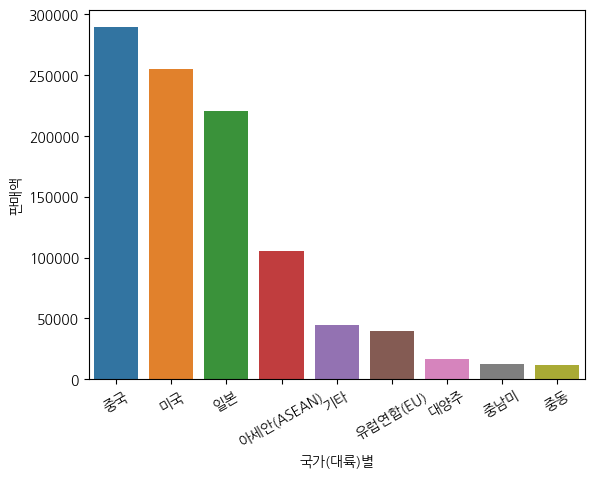

In [279]:
# barplot으로 시각화 한다.
plt.xticks(rotation=30)
sns.barplot(data=df_2020,x='국가(대륙)별',y='판매액')

## 📌 Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.

In [280]:
# df의 국가(대륙)별 컬럼의 값이 미국, 중국, 일본인 것만 찾기
# df의 상품군별 컬럼의 값이 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 인 것만 찾기
df_top3 = df[(df['국가(대륙)별'].isin(['미국','중국','일본']))&
             (df['상품군별'].isin(["의류 및 패션 관련상품", "화장품", "음반·비디오·악기" ]))]

(2016.0, 2021.0)

<Figure size 1500x500 with 0 Axes>

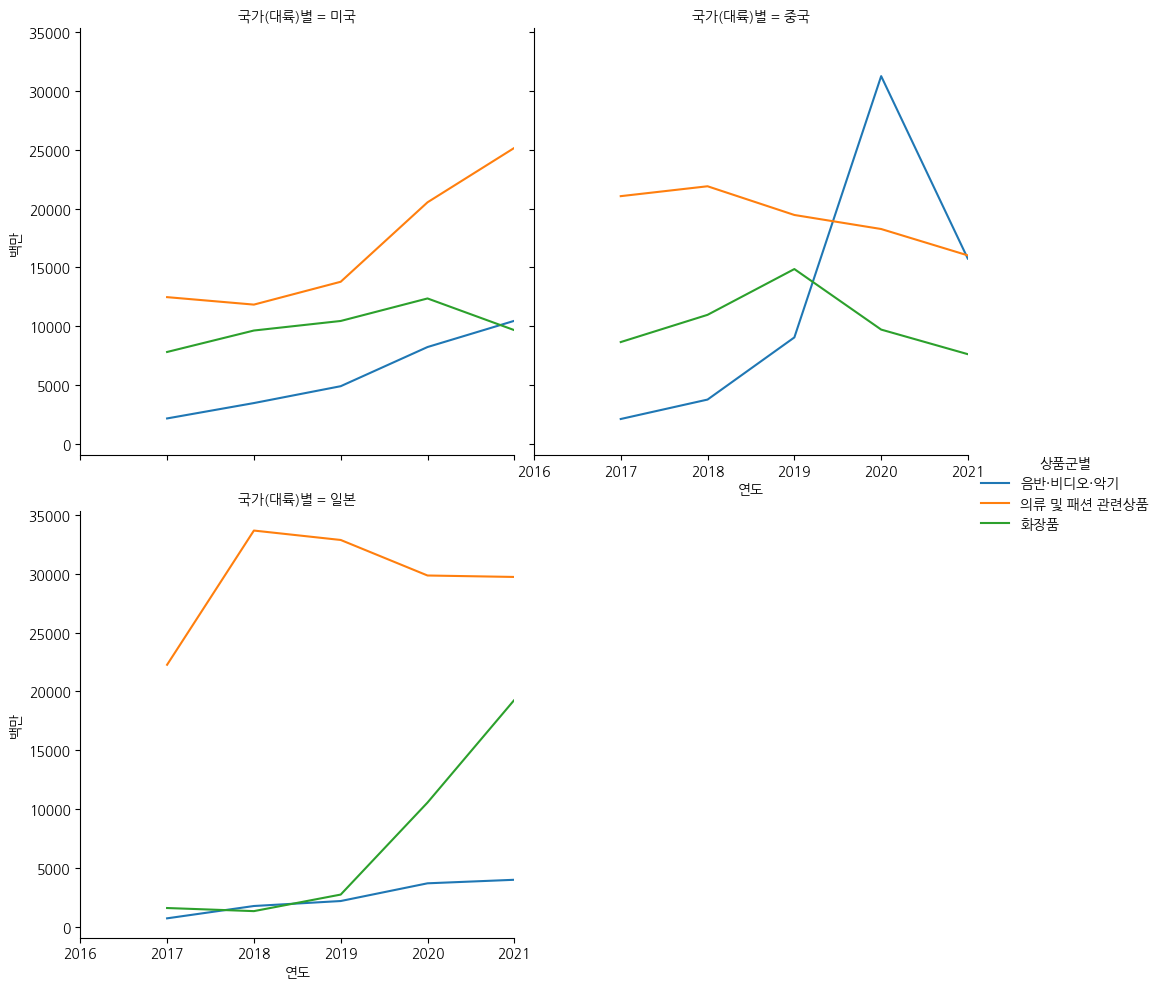

In [337]:
# 시각화 해주자.
plt.figure(figsize=(15,5))
sns.relplot(data=df_top3,x='연도',y='백만',col='국가(대륙)별',kind='line',hue='상품군별',errorbar=None,col_wrap=2)
plt.xlim(2016,2021)

## 📌 Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.

In [283]:
df2 = pd.read_csv('어업생산동향_총괄표_20230109114132.csv',encoding='cp949')

In [284]:
df2.columns

Index(['어업별', '행정구역별', '판매형태별', '항목', '2022.11 p)', '2018', '2019', '2020',
       '2021 p)'],
      dtype='object')

In [285]:
df2 = df2.rename(columns={'2021 p)':'2021','2022.11 p)':'2022'})

In [286]:
df2 = df2.melt(
    id_vars=['어업별', '행정구역별', '판매형태별','항목'],
    var_name='기간',
    value_name='생산량')

In [287]:
df2['기간'].value_counts()

2022    464
2018    464
2019    464
2020    464
2021    464
Name: 기간, dtype: int64

In [288]:
df2 = df2.rename(columns={'기간':'연도'})

In [289]:
df2.sample(10)

,어업별,행정구역별,판매형태별,항목,연도,생산량
1004,연근해어업,강원도,비계통,활어,2019,27535439
2063,해면양식업,울산광역시,비계통,활어,2021,4287188
418,내수면어업,전라북도,계,냉동,2022,-
1760,내수면어업,경기도,계,활어,2020,2707
1507,연근해어업,전라남도,계,냉동,2020,13622591
917,내수면어업,경상남도,계,냉동,2018,-
1087,연근해어업,경상남도,비계통,활어,2019,158385580
567,연근해어업,전라북도,계통,활어,2018,18775229
2053,해면양식업,인천광역시,비계통,냉동,2021,-
1056,연근해어업,경상북도,계,활어,2019,23012


In [290]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   어업별     2320 non-null   object
 1   행정구역별   2320 non-null   object
 2   판매형태별   2320 non-null   object
 3   항목      2320 non-null   object
 4   연도      2320 non-null   object
 5   생산량     2320 non-null   object
dtypes: object(6)
memory usage: 108.9+ KB


In [297]:
df2['연도'] = df2['연도'].astype(int)
# df2['생산량'] = df2['생산량'].astype(int)

In [295]:
df2['생산량'] = df2['생산량'].replace('-',np.nan).astype(float)

In [298]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   어업별     2320 non-null   object 
 1   행정구역별   2320 non-null   object 
 2   판매형태별   2320 non-null   object 
 3   항목      2320 non-null   object 
 4   연도      2320 non-null   int32  
 5   생산량     2034 non-null   float64
dtypes: float64(1), int32(1), object(4)
memory usage: 99.8+ KB


<Figure size 2000x400 with 0 Axes>

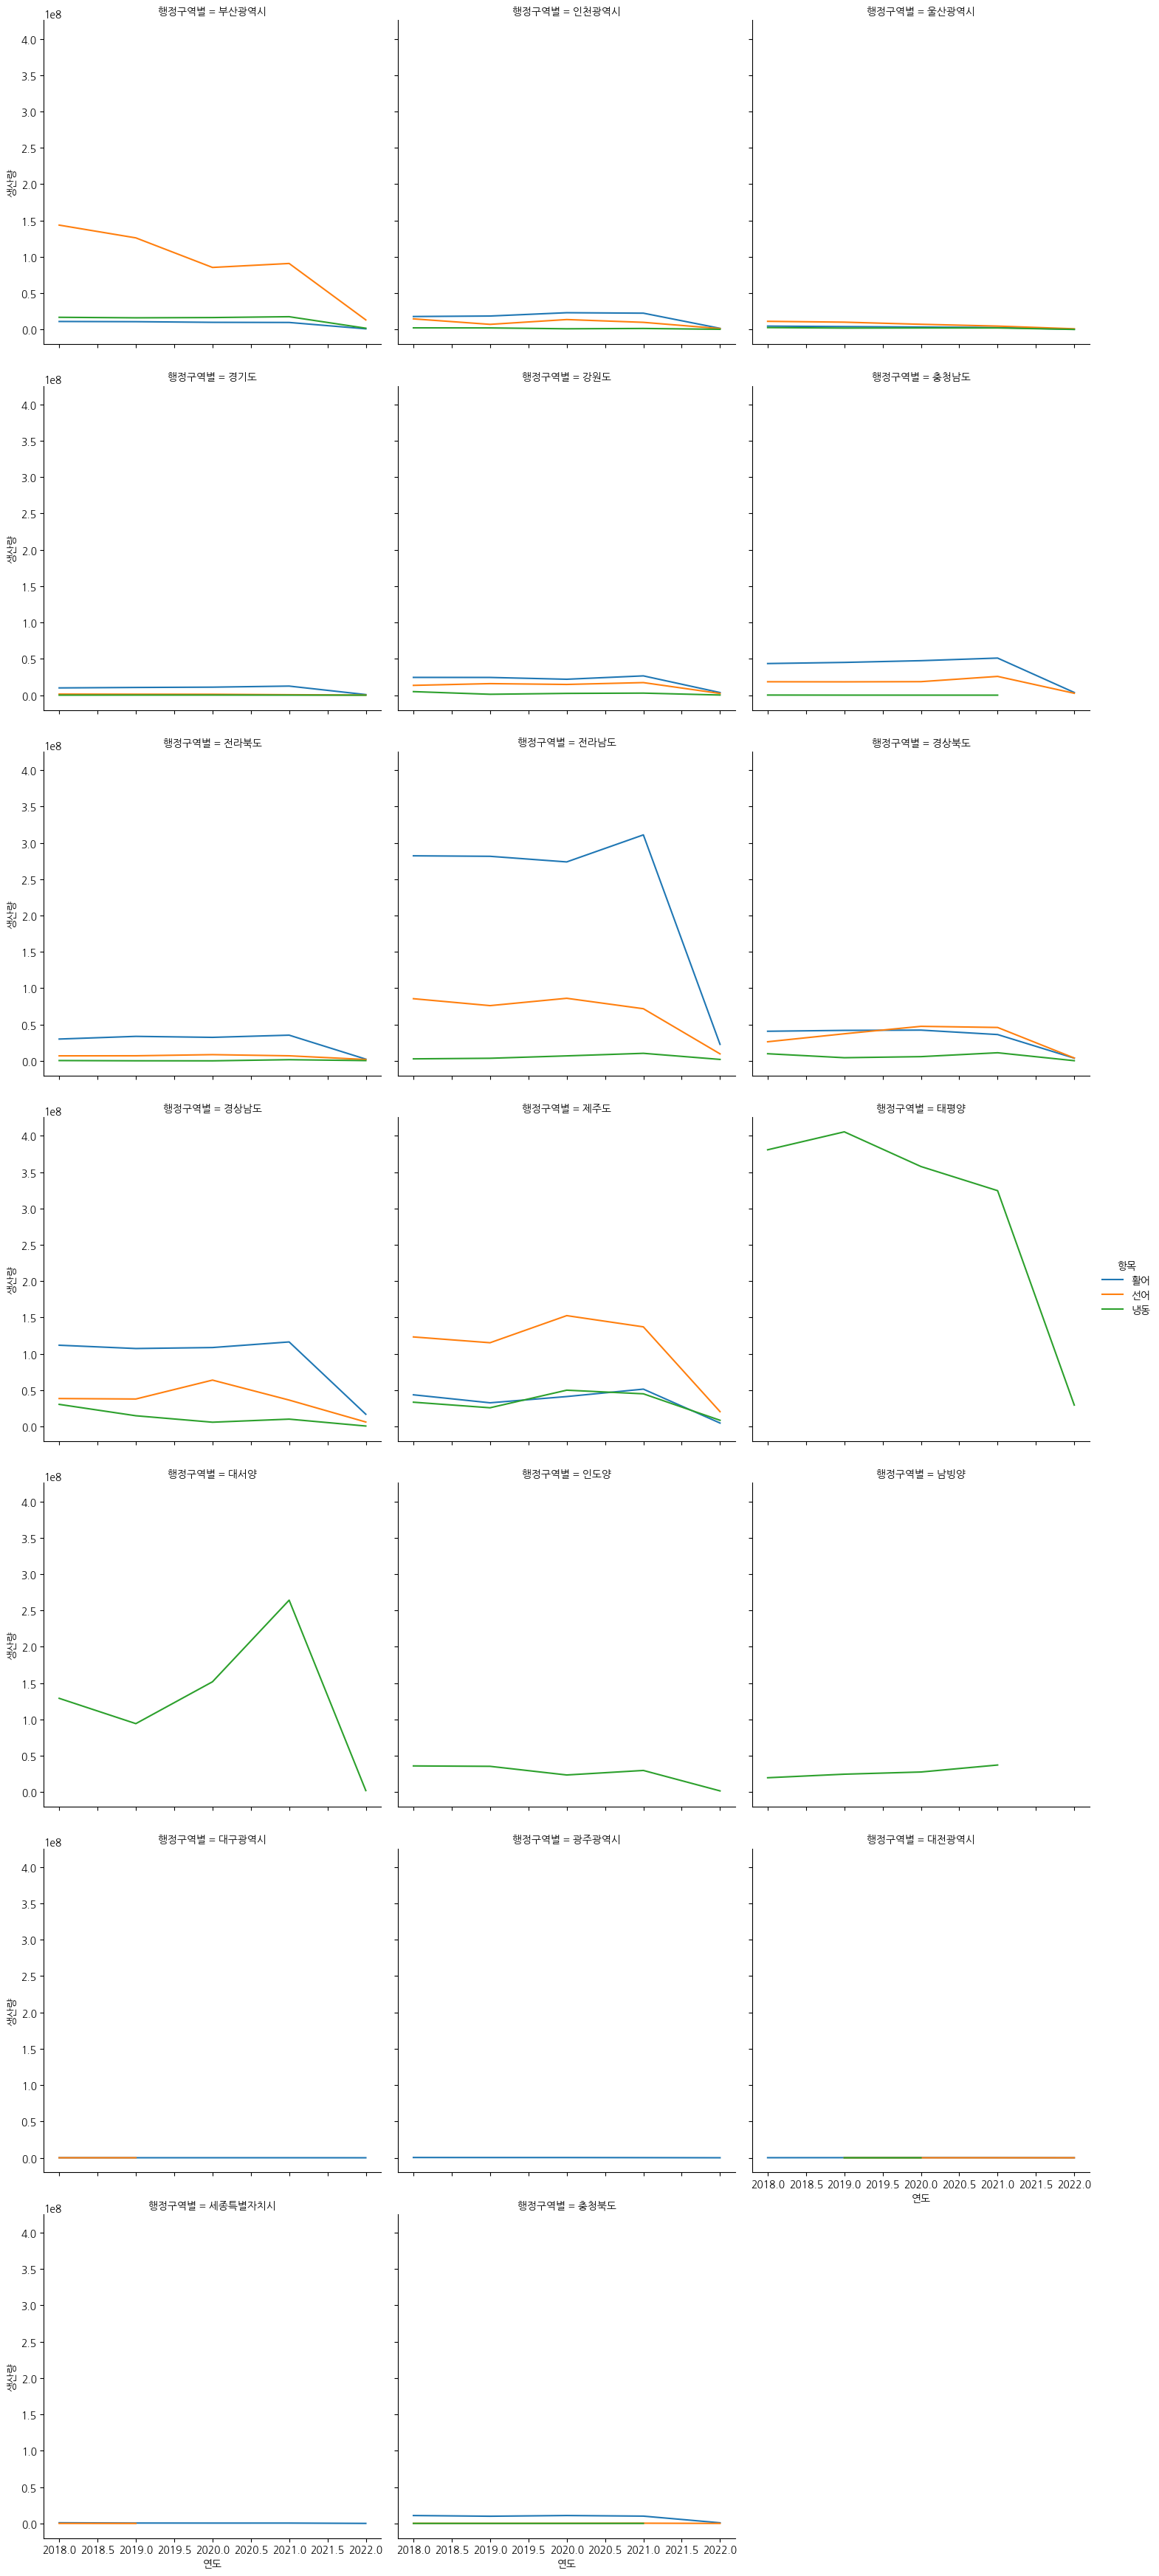

<Figure size 2000x400 with 0 Axes>

In [311]:
sns.relplot(data=df2,x='연도',y='생산량',hue='항목',col='행정구역별',col_wrap=3,kind='line',errorbar=None)
plt.figure(figsize=(20,4))

In [313]:
df2

,어업별,행정구역별,판매형태별,항목,연도,생산량
0,연근해어업,부산광역시,계,활어,2022,350.0
1,연근해어업,부산광역시,계,선어,2022,42917.0
2,연근해어업,부산광역시,계,냉동,2022,1746.0
3,연근해어업,부산광역시,계,활어,2022,3782188.0
4,연근해어업,부산광역시,계,선어,2022,66346477.0
...,...,...,...,...,...,...
2315,내수면어업,경상남도,비계통,냉동,2021,24847.0
2316,내수면어업,제주도,계,활어,2021,32.0
2317,내수면어업,제주도,계,활어,2021,1280000.0
2318,내수면어업,제주도,비계통,활어,2021,32.0


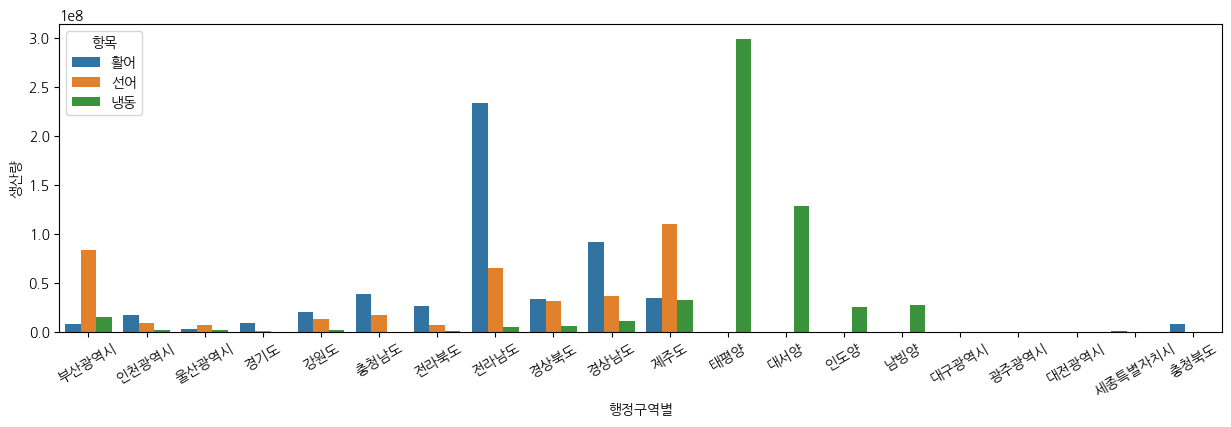

In [324]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.barplot(data=df2,x='행정구역별',y='생산량',errorbar=None,hue='항목');

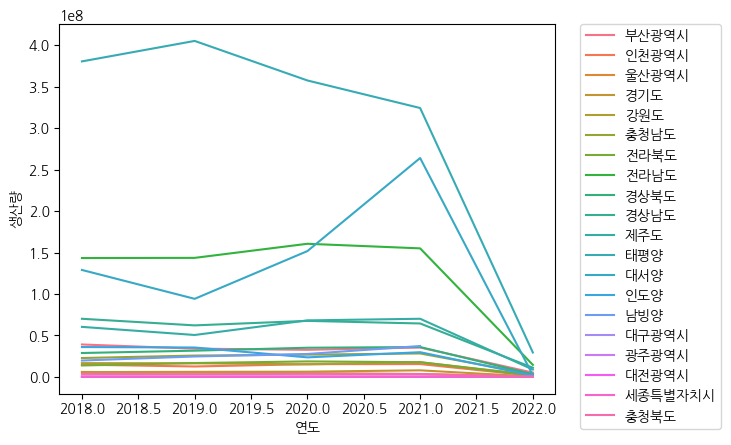

In [329]:
sns.lineplot(data=df2,x='연도',y='생산량',hue='행정구역별',errorbar=None)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.) # 범례가 밖으로 빠짐

<AxesSubplot: xlabel='연도', ylabel='생산량'>

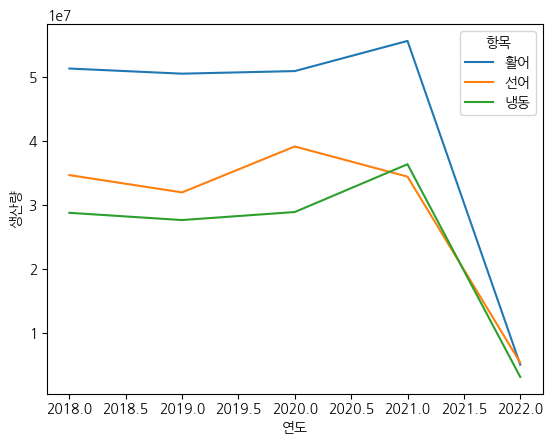

In [330]:
sns.lineplot(data=df2,x='연도',y='생산량',hue='항목',errorbar=None)